In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import csv
import json
import copy
from os import path

from pprint import pprint

from versuchung.search import *

import sys
import memtier

from versuchung.tex import DatarefDict

plt.style.use('bmh')
plt.rcParams["axes.labelcolor"] = "black"
plt.rcParams['axes.axisbelow'] = True
plt.rcParams["xtick.color"] = "black"
plt.rcParams["ytick.color"] = "black"
plt.rcParams["xtick.labelcolor"] = "black"
plt.rcParams["ytick.labelcolor"] = "black"
plt.rcParams["axes.labelcolor"] = "black"
plt.rcParams['axes.facecolor'] = '#F5F5F5'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.framealpha'] = '0.8'
plt.rcParams['hatch.linewidth'] = 1

cpumasks = [
    "64=0-31", # 1
    "64=0-15 72=16-31", # 2
    "64=0-7 68=8-15 72=16-23 76=24-31", # 4
    "64=0-3 66=4-7 68=8-11 70=12-15 72=16-19 74=20-23 76=24-27 78=28-31", # 8
    "64=0-1 65=2-3 66=4-5 67=6-7 68=8-9 69=10-11 70=12-13 71=14-15 72=16-17 73=18-19 74=20-21 75=22-23 76=24-25 77=26-27 78=28-29 79=30-31" #16
]

exps = {
    'baseline':
    {'query': { 'scope': 'nil',
                'ld_preload': '' }},
    'svc-char':
    {'query': { 'scope': 'char',
                'variant': 'syscall',
                'ld_preload': '' }},
    'svc-strong':
    {'query': { 'scope': 'strong',
                'variant': 'syscall',
                'ld_preload': '' }},
    'svc-all':
    {'query': { 'scope': 'all',
                'variant': 'syscall',
                'ld_preload': '' }},
    'svc-libkpac':
    {'query': { 'scope': 'nil',
                'ld_preload': '../../libkpac/libkpac.so',
                'libkpac_mode': 'svc-only' }},
    'kpacd-1-char':
    {'query': { 'scope': 'char',
                'variant': 'kpacd',
                'ld_preload': '',
                'cpumasks': cpumasks[0] }},
    'kpacd-1-strong':
    {'query': { 'scope': 'strong',
                'variant': 'kpacd',
                'ld_preload': '',
                'cpumasks': cpumasks[0] }},
    'kpacd-1-all':
    {'query': { 'scope': 'all',
                'variant': 'kpacd',
                'ld_preload': '',
                'cpumasks': cpumasks[0] }},
    'kpacd-1-libkpac':
    {'query': { 'scope': 'nil',
                'ld_preload': '../../libkpac/libkpac.so',
                'libkpac_mode': 'kpacd-svc',
                'cpumasks': cpumasks[0] }},
    'kpacd-2-char':
    {'query': { 'scope': 'char',
                'variant': 'kpacd',
                'ld_preload': '',
                'cpumasks': cpumasks[1] }},
    'kpacd-2-strong':
    {'query': { 'scope': 'strong',
                'variant': 'kpacd',
                'ld_preload': '',
                'cpumasks': cpumasks[1] }},
    'kpacd-2-all':
    {'query': { 'scope': 'all',
                'variant': 'kpacd',
                'ld_preload': '',
                'cpumasks': cpumasks[1] }},
    'kpacd-2-libkpac':
    {'query': { 'scope': 'nil',
                'ld_preload': '../../libkpac/libkpac.so',
                'libkpac_mode': 'kpacd-svc',
                'cpumasks': cpumasks[1] }},\
    'kpacd-4-char':
    {'query': { 'scope': 'char',
                'variant': 'kpacd',
                'ld_preload': '',
                'cpumasks': cpumasks[2] }},
    'kpacd-4-strong':
    {'query': { 'scope': 'strong',
                'variant': 'kpacd',
                'ld_preload': '',
                'cpumasks': cpumasks[2] }},
    'kpacd-4-all':
    {'query': { 'scope': 'all',
                'variant': 'kpacd',
                'ld_preload': '',
                'cpumasks': cpumasks[2] }},
    'kpacd-4-libkpac':
    {'query': { 'scope': 'nil',
                'ld_preload': '../../libkpac/libkpac.so',
                'libkpac_mode': 'kpacd-svc',
                'cpumasks': cpumasks[2] }},
    'kpacd-8-char':
    {'query': { 'scope': 'char',
                'variant': 'kpacd',
                'ld_preload': '',
                'cpumasks': cpumasks[3] }},
    'kpacd-8-strong':
    {'query': { 'scope': 'strong',
                'variant': 'kpacd',
                'ld_preload': '',
                'cpumasks': cpumasks[3] }},
    'kpacd-8-all':
    {'query': { 'scope': 'all',
                'variant': 'kpacd',
                'ld_preload': '',
                'cpumasks': cpumasks[3] }},
    'kpacd-8-libkpac':
    {'query': { 'scope': 'nil',
                'ld_preload': '../../libkpac/libkpac.so',
                'libkpac_mode': 'kpacd-svc',
                'cpumasks': cpumasks[3] }},
    'kpacd-16-char':
    {'query': { 'scope': 'char',
                'variant': 'kpacd',
                'ld_preload': '',
                'cpumasks': cpumasks[4] }},
    'kpacd-16-strong':
    {'query': { 'scope': 'strong',
                'variant': 'kpacd',
                'ld_preload': '',
                'cpumasks': cpumasks[4] }},
    'kpacd-16-all':
    {'query': { 'scope': 'all',
                'variant': 'kpacd',
                'ld_preload': '',
                'cpumasks': cpumasks[4] }},
    'kpacd-16-libkpac':
    {'query': { 'scope': 'nil',
                'ld_preload': '../../libkpac/libkpac.so',
                'libkpac_mode': 'kpacd-svc',
                'cpumasks': cpumasks[4] }},
}

datapath = "data/"
for k in exps:
    print(k)
    exps[k]['exp'] = search_experiment(memtier.Memtier, datapath, exps[k]['query'])

for k, v in exps.items():
    print(f'{k}: {v["exp"].path}')
    pprint(v["exp"].metadata)

baseline
svc-char
svc-strong
svc-all
svc-libkpac
kpacd-1-char
kpacd-1-strong
kpacd-1-all
kpacd-1-libkpac
kpacd-2-char
kpacd-2-strong
kpacd-2-all
kpacd-2-libkpac
kpacd-4-char
kpacd-4-strong
kpacd-4-all
kpacd-4-libkpac
kpacd-8-char
kpacd-8-strong
kpacd-8-all
kpacd-8-libkpac
kpacd-16-char
kpacd-16-strong
kpacd-16-all
kpacd-16-libkpac
baseline: /srv/scratch/ill.ostapyshyn/proj/kpac/rtas-pac/data/memcached/data/Memtier-83cc79ec9e472655b10deb0b863bedd0
{'arch': 'aarch64',
 'backend': 'siphash',
 'cflags': '-O2',
 'client_cpus': '32-63',
 'client_threads': '32',
 'cpumasks': '',
 'date-end': '2023-10-18 19:36:57.945430',
 'date-start': '2023-10-18 19:35:03.161088',
 'experiment-hash': '83cc79ec9e472655b10deb0b863bedd0',
 'experiment-name': 'Memtier',
 'experiment-version': 1,
 'host': 'armorix',
 'kernel': 'Linux 6.1.58-kpac+ #7 SMP Wed Oct 18 19:24:43 CEST 2023',
 'ld_preload': '',
 'libkpac_mode': '',
 'memcached': '../memcached',
 'memtier': '../memtier_benchmark',
 'memtier_args': '--test

In [2]:
asp = {'avg': 'Average latency [ms]',
       'p99': 'P99 tail latency [ms]',
       'p99.9': 'P99.9 tail latency[ms]',
       'p50': 'Median latency [ms]',
      }

stats = {}
for k, v in exps.items():
    with open(v['exp'].o.json.path) as f:
        j = json.load(f)

    stats[k] = {}
    stats[k]['avg']=j['ALL STATS']['Totals']['Average Latency']
    stats[k]['p50']=j['ALL STATS']['Totals']['Percentile Latencies']['p50.00']
    stats[k]['p99']=j['ALL STATS']['Totals']['Percentile Latencies']['p99.00']
    stats[k]['p99.9']=j['ALL STATS']['Totals']['Percentile Latencies']['p99.90']

stats = pd.DataFrame(stats)
display(stats)

,baseline,svc-char,svc-strong,svc-all,svc-libkpac,kpacd-1-char,kpacd-1-strong,kpacd-1-all,kpacd-1-libkpac,kpacd-2-char,...,kpacd-4-all,kpacd-4-libkpac,kpacd-8-char,kpacd-8-strong,kpacd-8-all,kpacd-8-libkpac,kpacd-16-char,kpacd-16-strong,kpacd-16-all,kpacd-16-libkpac
avg,1.090,1.096,1.095,1.092,1.091,1.100,3.115,9.297,8.773,1.100,...,2.365,2.240,1.099,1.100,1.430,1.399,1.100,1.098,1.328,1.306
p50,1.015,1.015,0.991,1.055,1.047,1.015,3.103,9.279,8.767,1.015,...,2.319,2.191,1.015,1.047,1.399,1.367,1.015,1.031,1.287,1.263
p99,1.655,1.663,2.039,2.127,2.127,1.679,3.359,10.303,9.791,1.671,...,3.567,3.727,1.671,2.159,2.607,2.655,1.679,2.143,2.559,2.527
p99.9,3.887,3.919,3.935,3.839,3.839,3.983,8.639,16.511,16.895,3.983,...,6.847,9.343,3.983,3.871,4.639,4.511,4.191,4.079,4.991,4.959


In [3]:
baseline = stats['baseline']
display(baseline)

svcs = stats[['svc-char', 'svc-strong', 'svc-all', 'svc-libkpac']]
display(svcs)

kpacds_nums = {
    1 : stats[['kpacd-1-char', 'kpacd-1-strong', 'kpacd-1-all', 'kpacd-1-libkpac']],
    2 : stats[['kpacd-2-char', 'kpacd-2-strong', 'kpacd-2-all', 'kpacd-2-libkpac']],
    4 : stats[['kpacd-4-char', 'kpacd-4-strong', 'kpacd-4-all', 'kpacd-4-libkpac']],
    8 : stats[['kpacd-8-char', 'kpacd-8-strong', 'kpacd-8-all', 'kpacd-8-libkpac']],
    16: stats[['kpacd-16-char', 'kpacd-16-strong', 'kpacd-16-all', 'kpacd-16-libkpac']],    
}

kpacds_scopes = {
    'char': stats[['kpacd-1-char', 'kpacd-2-char', 'kpacd-4-char', 'kpacd-8-char', 'kpacd-16-char']],
    'strong': stats[['kpacd-1-strong', 'kpacd-2-strong', 'kpacd-4-strong', 'kpacd-8-strong', 'kpacd-16-strong']],
    'all': stats[['kpacd-1-all', 'kpacd-2-all', 'kpacd-4-all', 'kpacd-8-all', 'kpacd-16-all']],
    'libkpac': stats[['kpacd-1-libkpac', 'kpacd-2-libkpac', 'kpacd-4-libkpac', 'kpacd-8-libkpac', 'kpacd-16-libkpac']], 
}

for i in kpacds_scopes.values():
    display(i)

kpacds = {}
for i in asp.keys():
    kpacds[i] = {k: v.loc[i] for k, v in kpacds_scopes.items()}
    for j in kpacds[i].values():
        j.index = [1, 2, 4, 8, 16]

    kpacds[i] = pd.DataFrame(kpacds[i])

avg      1.090
p50      1.015
p99      1.655
p99.9    3.887
Name: baseline, dtype: float64

,svc-char,svc-strong,svc-all,svc-libkpac
avg,1.096,1.095,1.092,1.091
p50,1.015,0.991,1.055,1.047
p99,1.663,2.039,2.127,2.127
p99.9,3.919,3.935,3.839,3.839


,kpacd-1-char,kpacd-2-char,kpacd-4-char,kpacd-8-char,kpacd-16-char
avg,1.100,1.100,1.100,1.099,1.100
p50,1.015,1.015,1.015,1.015,1.015
p99,1.679,1.671,1.671,1.671,1.679
p99.9,3.983,3.983,4.511,3.983,4.191


,kpacd-1-strong,kpacd-2-strong,kpacd-4-strong,kpacd-8-strong,kpacd-16-strong
avg,3.115,1.577,1.096,1.100,1.098
p50,3.103,1.527,1.055,1.047,1.031
p99,3.359,3.135,2.159,2.159,2.143
p99.9,8.639,5.279,3.855,3.871,4.079


,kpacd-1-all,kpacd-2-all,kpacd-4-all,kpacd-8-all,kpacd-16-all
avg,9.297,4.621,2.365,1.430,1.328
p50,9.279,4.607,2.319,1.399,1.287
p99,10.303,5.215,3.567,2.607,2.559
p99.9,16.511,12.415,6.847,4.639,4.991


,kpacd-1-libkpac,kpacd-2-libkpac,kpacd-4-libkpac,kpacd-8-libkpac,kpacd-16-libkpac
avg,8.773,4.360,2.240,1.399,1.306
p50,8.767,4.351,2.191,1.367,1.263
p99,9.791,4.895,3.727,2.655,2.527
p99.9,16.895,8.959,9.343,4.511,4.959


,char,strong,all,libkpac
kpacd-1\n(32:1),1.100,3.115,9.297,8.773
kpacd-2\n(32:2),1.100,1.577,4.621,4.360
kpacd-4\n(32:4),1.100,1.096,2.365,2.240
kpacd-8\n(32:8),1.099,1.100,1.430,1.399
kpacd-16\n(32:16),1.100,1.098,1.328,1.306
svc\n(32:0),1.096,1.095,1.092,1.091


,char,strong,all,libkpac
kpacd-1\n(32:1),1.679,3.359,10.303,9.791
kpacd-2\n(32:2),1.671,3.135,5.215,4.895
kpacd-4\n(32:4),1.671,2.159,3.567,3.727
kpacd-8\n(32:8),1.671,2.159,2.607,2.655
kpacd-16\n(32:16),1.679,2.143,2.559,2.527
svc\n(32:0),1.663,2.039,2.127,2.127


,char,strong,all,libkpac
kpacd-1\n(32:1),3.983,8.639,16.511,16.895
kpacd-2\n(32:2),3.983,5.279,12.415,8.959
kpacd-4\n(32:4),4.511,3.855,6.847,9.343
kpacd-8\n(32:8),3.983,3.871,4.639,4.511
kpacd-16\n(32:16),4.191,4.079,4.991,4.959
svc\n(32:0),3.919,3.935,3.839,3.839


,char,strong,all,libkpac
kpacd-1\n(32:1),1.015,3.103,9.279,8.767
kpacd-2\n(32:2),1.015,1.527,4.607,4.351
kpacd-4\n(32:4),1.015,1.055,2.319,2.191
kpacd-8\n(32:8),1.015,1.047,1.399,1.367
kpacd-16\n(32:16),1.015,1.031,1.287,1.263
svc\n(32:0),1.015,0.991,1.055,1.047


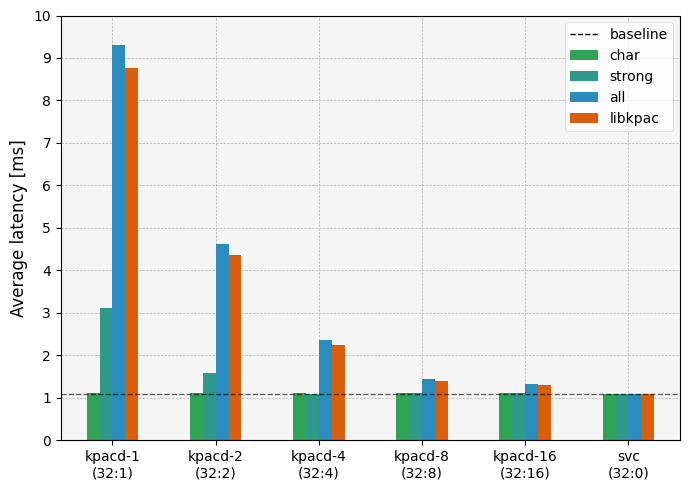

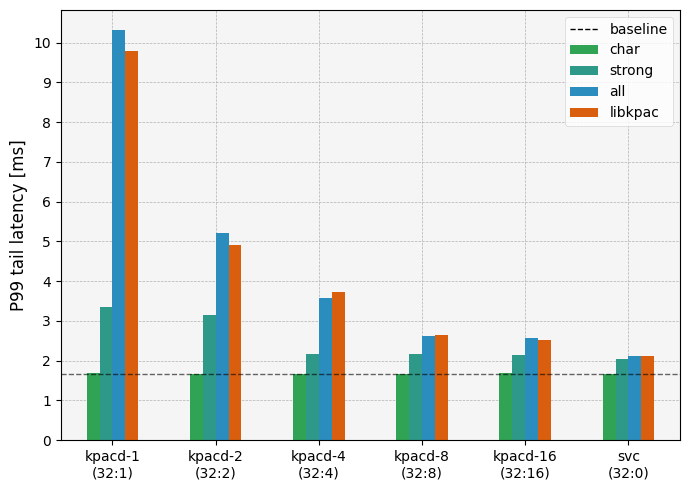

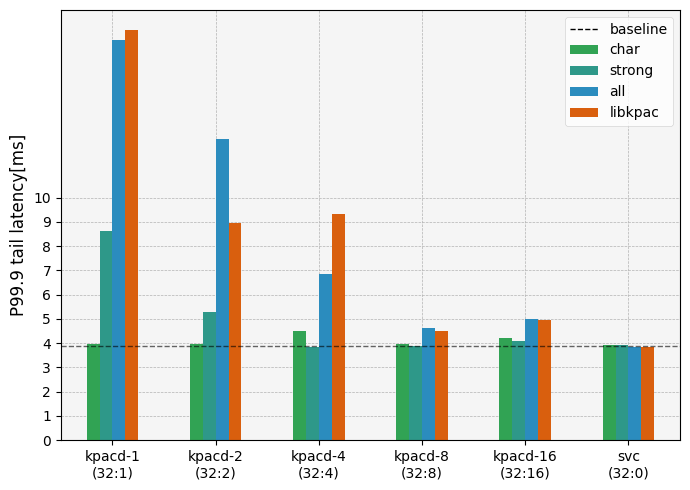

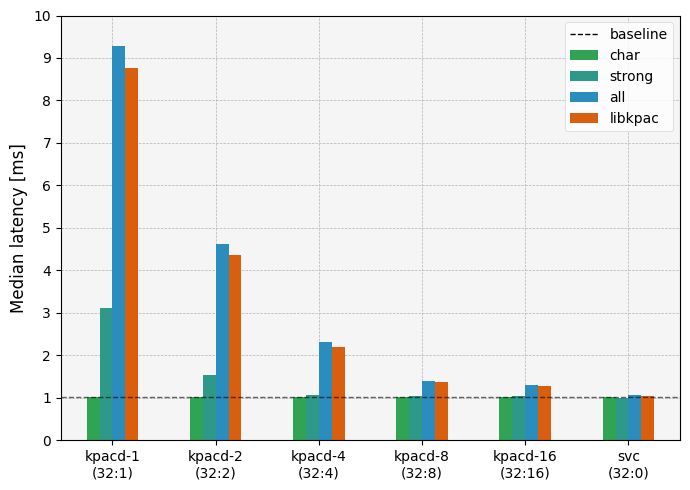

In [4]:
plottable = {}

dref_file = "baseline.tex"
try:
    os.unlink(dref_file)
except OSError:
    pass

dref_out = DatarefDict(dref_file)
dref_out.pandas(baseline,prefix='baseline')
dref_out.flush()

for target,title in asp.items():
    fig, ax = plt.subplots(figsize=(7,5))

    df = kpacds[target].copy()
    df.index = [f'kpacd-{i}' for i in df.index]
    df.loc["svc"] = svcs.loc[target].rename(lambda x: x[4:])

    dref_file = f"{target}.tex"
    try:
        os.unlink(dref_file)
    except OSError:
        pass

    dref_out = DatarefDict(dref_file)
    dref_out.pandas(df,prefix=target)
    dref_out.flush()

    df = df.rename({'svc': 'svc\n(32:0)',
                    'kpacd-1': 'kpacd-1\n(32:1)',
                    'kpacd-2': 'kpacd-2\n(32:2)',
                    'kpacd-4': 'kpacd-4\n(32:4)',
                    'kpacd-8': 'kpacd-8\n(32:8)',
                    'kpacd-16': 'kpacd-16\n(32:16)' })
    
    plottable[target] = df.copy()

    #df = df.iloc[::-1]
    
    display(df)

    tickheight = 11
    yticks = np.arange(0,tickheight,1)

    colors = ['#31a354','#2e9889','#2B8CBE','#D95F0E']

    df.plot.bar(ax=ax, rot=0, color=colors, ylabel=title)
    ax.axhline(y=baseline[target], linewidth=1, color='black', linestyle='--', alpha=0.6)

    red_patch1 = matplotlib.lines.Line2D([0], [0], color='black', linestyle='--', linewidth=1)
    handles, labels = ax.get_legend_handles_labels()
    handles = [red_patch1] + handles
    labels = ['baseline'] + labels

    ax.legend(handles, labels)
    ax.set_yticks(yticks)

    fig.tight_layout()
    plt.savefig(f"../../fig/memcached/{target}.pdf",bbox_inches='tight')

,char,strong,all,libkpac
svc\n(32:0),1.096,1.095,1.092,1.091
kpacd-16\n(32:16),1.100,1.098,1.328,1.306
kpacd-8\n(32:8),1.099,1.100,1.430,1.399
kpacd-4\n(32:4),1.100,1.096,2.365,2.240
kpacd-2\n(32:2),1.100,1.577,4.621,4.360
kpacd-1\n(32:1),1.100,3.115,9.297,8.773


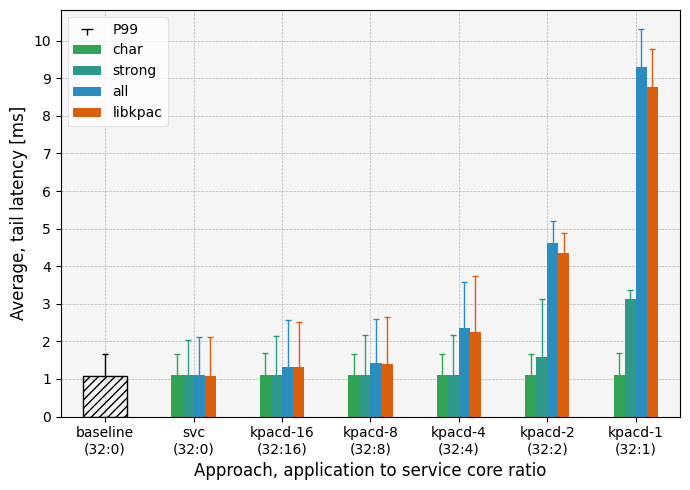

In [5]:
fig, ax = plt.subplots(figsize=(7,5))

target='avg'

df = plottable[target].iloc[::-1]
df99 = plottable['p99'].iloc[::-1]

    
display(df)

tickheight = 11
yticks = np.arange(0,tickheight,1)

colors = ['#31a354','#2e9889','#2B8CBE','#D95F0E']

df.plot.bar(ax=ax, rot=0, color=colors, ylabel='Average, tail latency [ms]', xlabel='Approach, application to service core ratio')
for (p, (row,col)) in zip(ax.patches, [(row,col) for col in df99.T.index for row in df99.index]):
    x = p.get_x()
    w = p.get_width()
    h = p.get_height()
    min_y = df[col][row]
    max_y = df99[col][row]

    colors_99 = {
        'char': colors[0],
        'strong': colors[1],
        'all': colors[2],
        'libkpac': colors[3]
    }

    color = colors_99[col]

    ax.vlines(x+w/2, min_y, max_y, color=color, linewidth=1)
    ax.plot(x+w/2, max_y, marker='_', color=color, markersize=5)

color= 'k' #'#666666'
baseline_x = -1

plt.rcParams['hatch.linewidth'] = 1
ax.bar(baseline_x, height=baseline[target], width=w*4, fill=False, hatch='////', edgecolor=color, linewidth=1)
ax.set_xlim(-1.5,5.5)
ax.vlines(baseline_x, baseline[target], baseline['p99'], linewidth=1, color=color)
ax.plot(baseline_x, baseline['p99'], marker='_', markersize=5, color=color)

xt = list(ax.get_xticks())
xtl = list(ax.get_xticklabels())

ax.set_xticks(xt + [baseline_x])
ax.set_xticklabels(xtl + ['baseline\n(32:0)'])

#ax.axhline(y=baseline[target], linewidth=1, color='black', linestyle='--', alpha=0.6)
#ax.axhline(y=baseline['p99'], linewidth=1, color='black', linestyle='-', alpha=0.6)

p99_patch = matplotlib.lines.Line2D([], [], color='black', marker='_', markersize=8, linewidth=0)
p99_patch1 = matplotlib.lines.Line2D([], [], color='black', marker=3, markersize=4, linewidth=0)

handles, labels = ax.get_legend_handles_labels()
handles = [(p99_patch, p99_patch1)] + handles
labels = ['P99'] + labels

ax.legend(handles, labels)
ax.set_yticks(yticks)

fig.tight_layout()
plt.savefig(f"../../fig/memcached/{target}_p99.pdf",bbox_inches='tight')

In [21]:
libkpac_exps = {
    'svc-libkpac': exps['svc-libkpac']['exp'],
    'kpacd-libkpac': exps['kpacd-1-libkpac']['exp']
}

libkpac = {
    'svc-libkpac': {},
    'kpacd-libkpac': {}
}

for k,v in libkpac_exps.items():
    with open(v.o.libkpac.path) as f:
        total = { 'time': 0,
                  'pac_total': 0,
                  'pac_patched': 0,
                  'aut_total': 0,
                  'aut_patched': 0 }
                    
        reader = list(csv.reader(f, delimiter=','))
        for row in reader:
            for j, a in enumerate(total.keys()):
                total[a] = total[a] + float(row[j+1])
                        #break

        libkpac[k]['times_nolib'] = reader[0][1]
        libkpac[k]['times'] = total['time']
        libkpac[k]['pac/total'] = total['pac_total']
        libkpac[k]['pac/patched'] = total['pac_patched']
        libkpac[k]['aut/total'] = total['aut_total']
        libkpac[k]['aut/patched'] = total['aut_patched']
        libkpac[k]['all/total'] = total['pac_total'] + total['aut_total']
        libkpac[k]['all/patched'] = total['pac_patched'] + total['aut_patched']

df = pd.DataFrame(libkpac)

dref_file = "libkpac.tex"
try:
    os.unlink(dref_file)
except OSError:
    pass

dref_out = DatarefDict(dref_file)
dref_out.pandas(df.T)
dref_out.flush()